# **K-Nearest Neighbors (KNN)**

* The KNN algorithm is a supervised learning algorithm used for classification and regression tasks.
* How KNN works?
  
  1) Choose a value for K:
    - The number of nearest neighbors to consider (commonly an odd number to avoid ties in classification).
  
  2) Calculate the distance:
    - Given a test sample, calculate its distance to all training samples.
    - The most common used distance metrics are the Euclidean and Manhattan distances.

  3) Find K nearest neighbors:
    - Based on the calculated distance, find the K closest points.

  4) Make a prediction:
    - For classification -> assign the most frequent class among the K neighbors.
    - For regression -> return the average of the K neighbors' values.

* Choosing K:
  - Small K -> is more sensitive to noise and may cause overfitting.
  - Large K -> smoother decision boundary but may lead to underfitting.

  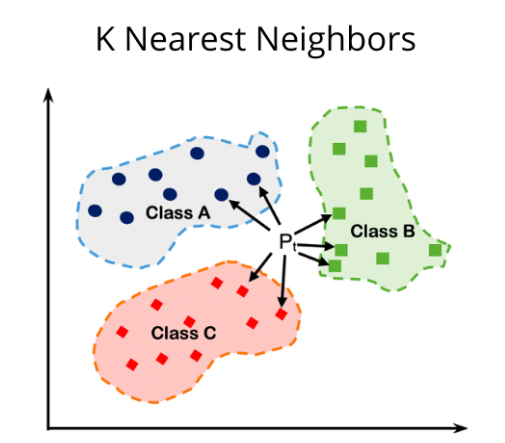


# **Implementation using important Python libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load the iris dataset**

In [2]:
iris = load_iris()
X = iris.data
y = iris.target  # Labels (0, 1, 2) corresponding to Setosa, Versicolor, Virginica

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Data normalization**

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train the KNN model using sklearn**


In [15]:
k = 7
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Make predictions on the test set**

In [16]:
y_pred = knn.predict(X_test)
print(y_pred)

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 1 2 2 1 1 0 2 0]


**Evaluate the model**

Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



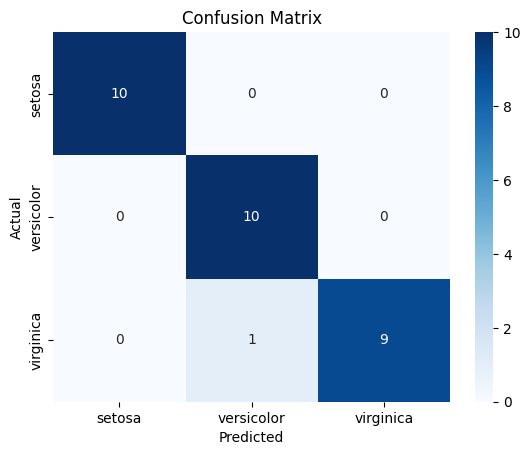

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Evaluation for different K values**

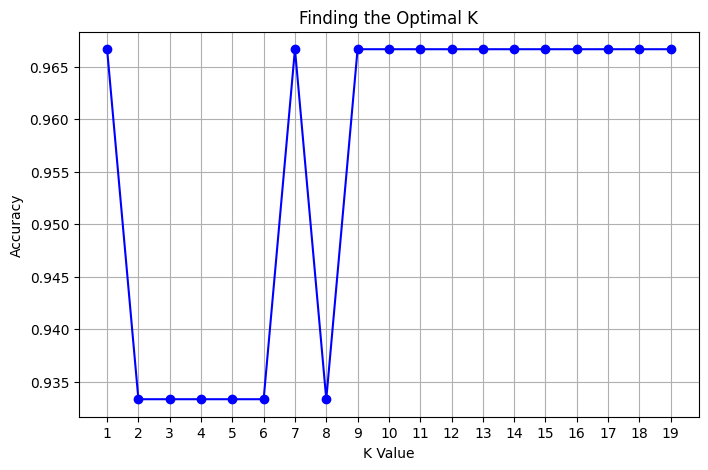

In [14]:
k_values = range(1, 20)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Finding the Optimal K")
plt.xticks(k_values)
plt.grid()
plt.show()